Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


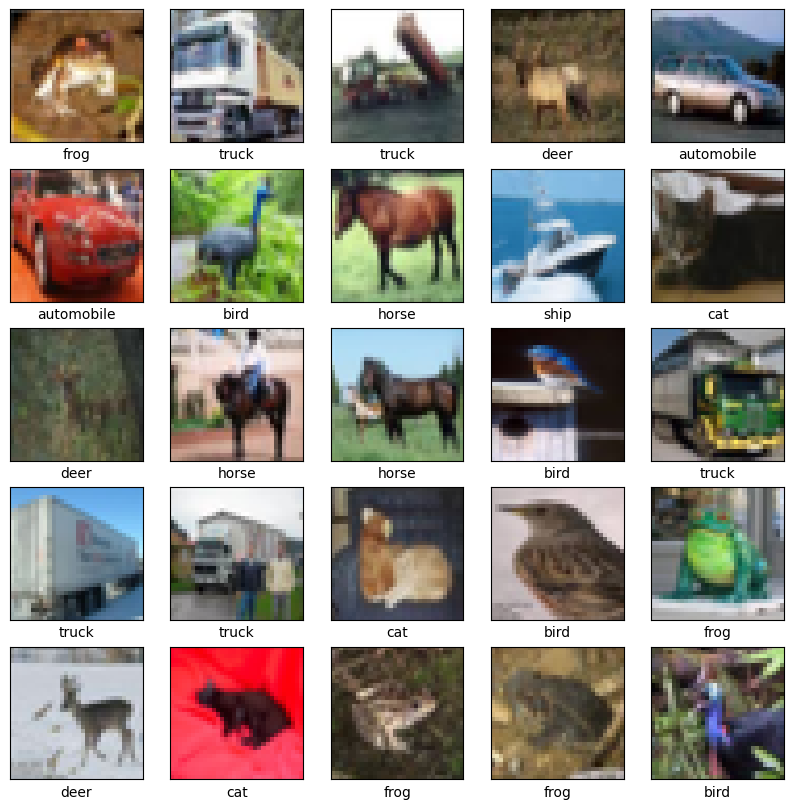

In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical


# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Show shape of the data
print(f'Training images shape: {train_images.shape}')
print(f'Training labels shape: {train_labels.shape}')
print(f'Test images shape: {test_images.shape}')
print(f'Test labels shape: {test_labels.shape}')

# Plot some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Preprocessing
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(200, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(train_images, train_labels, epochs=30, batch_size=16, validation_split=0.2)

# Evaluate model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Epoch 1/30
2500/2500 [==============================] - 68s 27ms/step - loss: 1.4679 - accuracy: 0.4681 - val_loss: 1.1754 - val_accuracy: 0.5885
Epoch 2/30
2500/2500 [==============================] - 65s 26ms/step - loss: 1.1072 - accuracy: 0.6126 - val_loss: 1.0518 - val_accuracy: 0.6383
Epoch 3/30
2500/2500 [==============================] - 65s 26ms/step - loss: 0.9586 - accuracy: 0.6641 - val_loss: 0.9615 - val_accuracy: 0.6649
Epoch 4/30
2500/2500 [==============================] - 63s 25ms/step - loss: 0.8551 - accuracy: 0.7037 - val_loss: 1.0216 - val_accuracy: 0.6438
Epoch 5/30
2500/2500 [==============================] - 66s 26ms/step - loss: 0.7725 - accuracy: 0.7283 - val_loss: 0.9234 - val_accuracy: 0.6844
Epoch 6/30
2500/2500 [==============================] - 63s 25ms/step - loss: 0.6906 - accuracy: 0.7582 - val_loss: 0.8820 - val_accuracy: 0.7005
Epoch 7/30
2500/2500 [==============================] - 72s 29ms/step - loss: 0.6222 - accuracy: 0.7776 - val_loss: 0.9299 -

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# Preprocessing
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [ ]:
# Function to create a model
def create_model(conv_layers, dense_neurons, dropout_rate):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    for i in range(conv_layers - 1):
        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(dense_neurons, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))
    return model

In [ ]:
import numpy as np

# Hyperparameters combinations
conv_layers_options = [2, 3]
dense_neurons_options = [200, 256]
dropout_rate_options = [0.2, 0.3]
results = []
histories = []

for conv_layers in conv_layers_options:
    for dense_neurons in dense_neurons_options:
        for dropout_rate in dropout_rate_options:
            # Create and compile the model
            model = create_model(conv_layers, dense_neurons, dropout_rate)
            model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

            # Train the model and save the history
            print(f'Starting training for {conv_layers} conv layers, {dense_neurons} dense neurons, dropout rate of {dropout_rate}')
            history = model.fit(
                train_images, train_labels,
                epochs=30, batch_size=16,
                validation_split=0.2,
                verbose=1  # Set verbose to 1 to see progress bar
            )

            # Evaluate the model
            test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
            print(f'Finished training. Test accuracy: {test_acc}\n')

            # Save the results and history
            results.append((conv_layers, dense_neurons, dropout_rate, test_acc))
            histories.append(history)

# Convert results to a numpy array for easier indexing
results = np.array(results)


Starting training for 2 conv layers, 200 dense neurons, dropout rate of 0.2
Epoch 1/30
2500/2500 [==============================] - 96s 38ms/step - loss: 1.4432 - accuracy: 0.4793 - val_loss: 1.2035 - val_accuracy: 0.5773
Epoch 2/30
2500/2500 [==============================] - 92s 37ms/step - loss: 1.0830 - accuracy: 0.6191 - val_loss: 1.0050 - val_accuracy: 0.6494
Epoch 3/30
2500/2500 [==============================] - 93s 37ms/step - loss: 0.9333 - accuracy: 0.6715 - val_loss: 0.9648 - val_accuracy: 0.6638
Epoch 4/30
2500/2500 [==============================] - 101s 40ms/step - loss: 0.8222 - accuracy: 0.7122 - val_loss: 0.9728 - val_accuracy: 0.6672
Epoch 5/30
2500/2500 [==============================] - 93s 37ms/step - loss: 0.7307 - accuracy: 0.7433 - val_loss: 0.9236 - val_accuracy: 0.6898
Epoch 6/30
2500/2500 [==============================] - 96s 38ms/step - loss: 0.6471 - accuracy: 0.7707 - val_loss: 0.9169 - val_accuracy: 0.7006
Epoch 7/30
2500/2500 [=========================

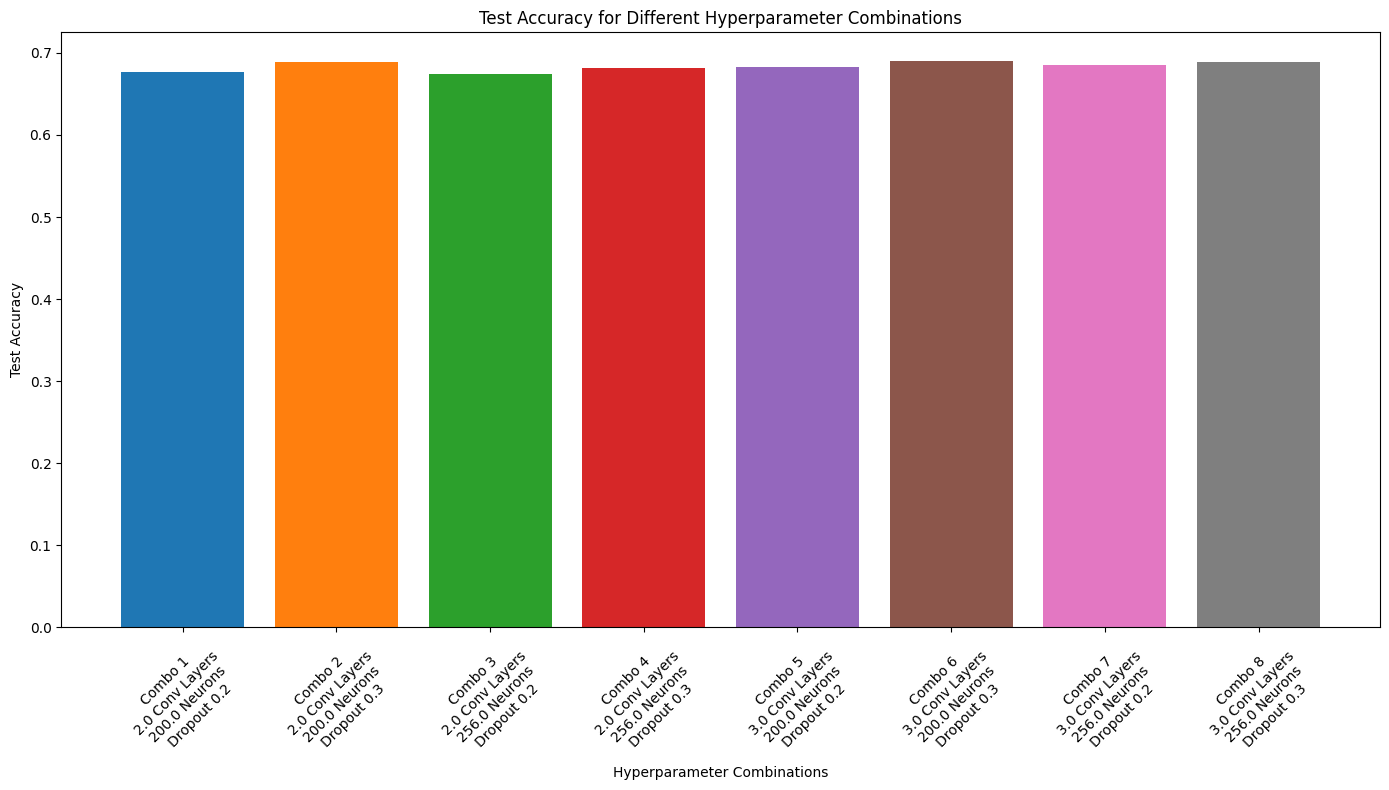

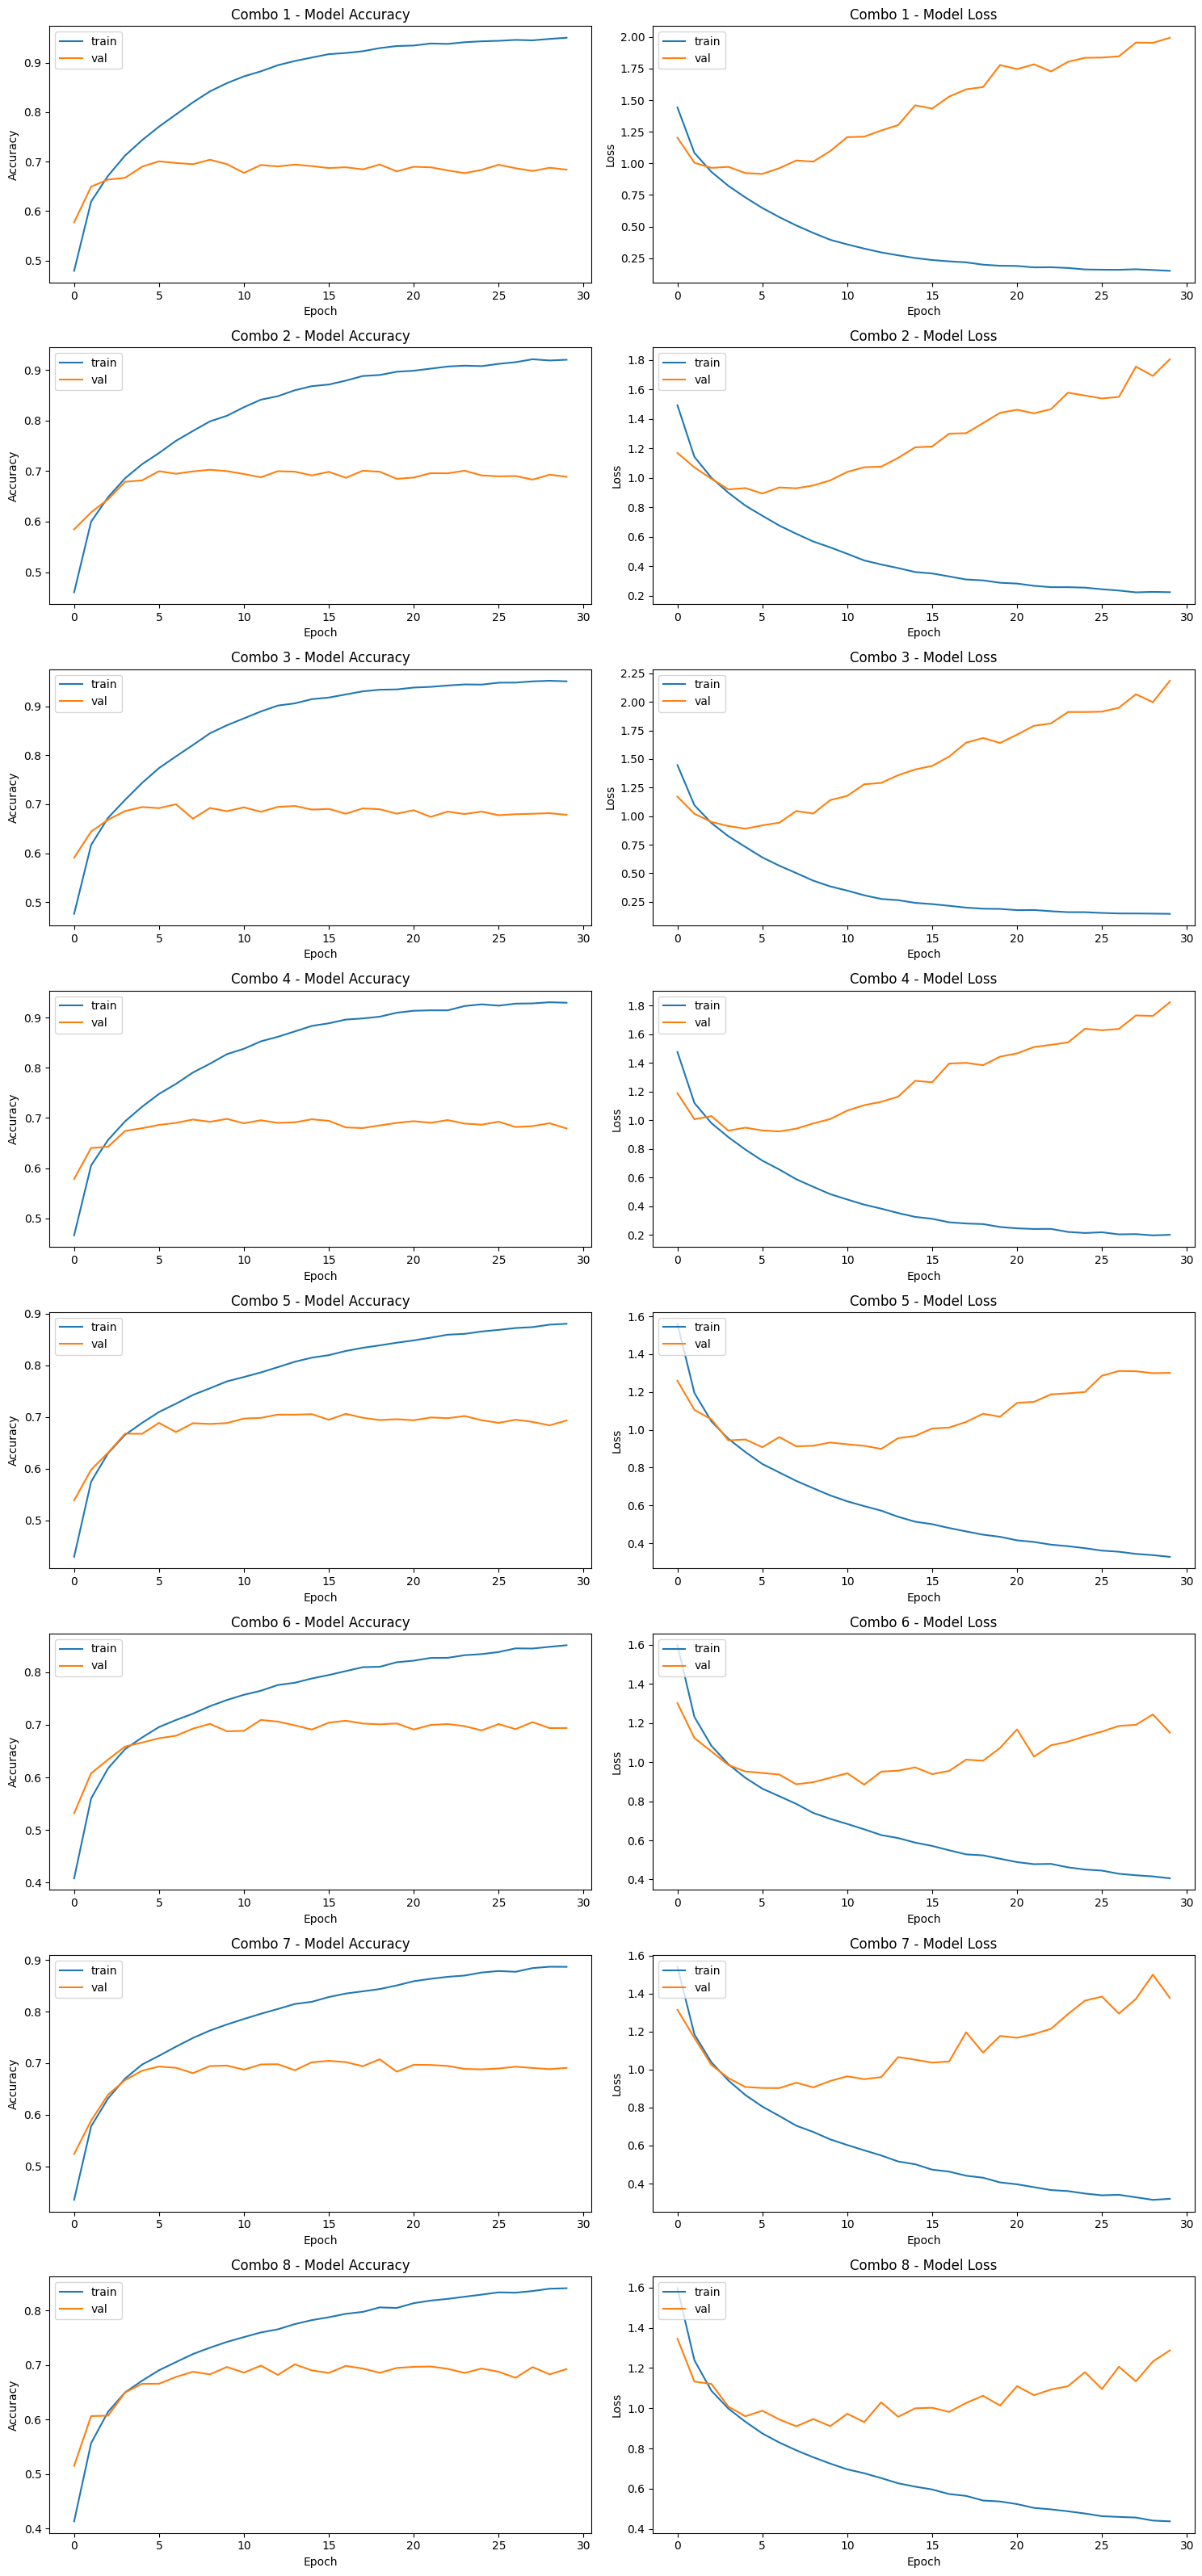

In [ ]:
# Plotting the test accuracy for each hyperparameter combination
plt.figure(figsize=(14, 8))
for i, (conv_layers, dense_neurons, dropout_rate, test_acc) in enumerate(results):
    plt.bar(f'Combo {i+1}\n{conv_layers} Conv Layers\n{dense_neurons} Neurons\nDropout {dropout_rate}', test_acc)

plt.title('Test Accuracy for Different Hyperparameter Combinations')
plt.ylabel('Test Accuracy')
plt.xlabel('Hyperparameter Combinations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting training + validation accuracy and loss for each combination
fig, axes = plt.subplots(len(results), 2, figsize=(15, len(results) * 4))

for i, history in enumerate(histories):
    # Summary of history for accuracy
    axes[i, 0].plot(history.history['accuracy'])
    axes[i, 0].plot(history.history['val_accuracy'])
    axes[i, 0].set_title(f'Combo {i+1} - Model Accuracy')
    axes[i, 0].set_ylabel('Accuracy')
    axes[i, 0].set_xlabel('Epoch')
    axes[i, 0].legend(['train', 'val'], loc='upper left')

    # Summary of history for loss
    axes[i, 1].plot(history.history['loss'])
    axes[i, 1].plot(history.history['val_loss'])
    axes[i, 1].set_title(f'Combo {i+1} - Model Loss')
    axes[i, 1].set_ylabel('Loss')
    axes[i, 1].set_xlabel('Epoch')
    axes[i, 1].legend(['train', 'val'], loc='upper left')

plt.tight_layout()
plt.show()

